In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './..')
sys.path.insert(0, './../scripts')

In [2]:
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import burst_func as bf
import plot_func as pf

# Plot RFs for Given Seed and Iteration Number

In [3]:
ngrid = 20

xs,ys = np.meshgrid(np.linspace(0.5/ngrid,1-0.5/ngrid,ngrid),np.linspace(0.5/ngrid,1-0.5/ngrid,ngrid))
xs,ys = xs.flatten(),ys.flatten()

in_rf = np.sqrt((xs-0.5)**2 + (ys-0.5)**2) < 0.5/np.sqrt(2)
xs,ys = xs[in_rf],ys[in_rf]
n_in_rf = len(xs)

x_idxs = np.round((xs - np.min(xs))*ngrid).astype(int)
y_idxs = np.round((ys - np.min(ys))*ngrid).astype(int)

nrf = np.max(x_idxs)+1

In [96]:
reload(pf)

def plot_rfs(seed,n_iter):        
        
    fig,axs = plt.subplots(5, 4, figsize=(16,15), dpi=150)
    
    axs = axs.flatten()
    e_axs = axs[:16]
    i_axs = axs[16:]
    if n_iter >= 0:
        with open('./../results/sim_lgn_wave_rfs_ne=16_ni=4/' +\
            'seed={:d}_iter={:d}.pkl'.format(seed,n_iter), 'rb') as handle:
            res_dict = pickle.load(handle)
        
        wen = res_dict['wex'][:,:n_in_rf]
        wef = res_dict['wex'][:,n_in_rf:]
        win = res_dict['wix'][:,:n_in_rf]
        wif = res_dict['wix'][:,n_in_rf:]
    else:
        rng = np.random.default_rng(seed)
        wex = rng.uniform(0.4,0.6,size=(16,2*n_in_rf))
        wix = rng.uniform(0.4,0.6,size=(4,2*n_in_rf))
        
        wex *= 1.0 / np.sum(wex,axis=1,keepdims=True)
        wix *= 1.0 / np.sum(wix,axis=1,keepdims=True)
        
        wen = wex[:,:n_in_rf]
        wef = wex[:,n_in_rf:]
        win = wix[:,:n_in_rf]
        wif = wix[:,n_in_rf:]
        
    max_we = np.max(np.concatenate([wen.flatten(),wef.flatten()]))#2*np.mean(np.concatenate([wen.flatten(),wef.flatten()]))
    max_wi = np.max(np.concatenate([win.flatten(),wif.flatten()]))#2*np.mean(np.concatenate([win.flatten(),wif.flatten()]))
    
    for i in range(16):
        this_wn = np.zeros((nrf,nrf))
        this_wf = np.zeros((nrf,nrf))
        this_wn[x_idxs,y_idxs] = wen[i]
        this_wf[x_idxs,y_idxs] = wef[i]
        # pf.contourbar(fig,e_axs[i],this_wn-this_wf,cmap='RdBu',
        # levels=np.linspace(-max_we,max_we,13),linewidths=0.8,origin='lower')
        pf.doubimshbar(fig,e_axs[i],this_wn,-this_wf,cmap_name='RdBu',
            vmin=-max_we,vmax=max_we,origin='lower')
        pf.doubcont(fig,e_axs[i],this_wn,-this_wf,cmap='RdBu',
            levels=np.linspace(-max_we,max_we,7),linewidths=0.8,origin='lower')
        # levels=np.linspace(-max_we,max_we,13),linewidths=0.8,origin='lower')
        
    for i in range(4):
        this_wn = np.zeros((nrf,nrf))
        this_wf = np.zeros((nrf,nrf))
        this_wn[x_idxs,y_idxs] = win[i]
        this_wf[x_idxs,y_idxs] = wif[i]
        pf.doubimshbar(fig,i_axs[i],this_wn,-this_wf,cmap_name='RdBu',
            vmin=-max_wi,vmax=max_wi,origin='lower')
        pf.doubcont(fig,i_axs[i],this_wn,-this_wf,cmap='RdBu',
            levels=np.linspace(-max_wi,max_wi,7),linewidths=0.8,origin='lower')
        # levels=np.linspace(-max_wi,max_wi,13),linewidths=0.8,origin='lower')

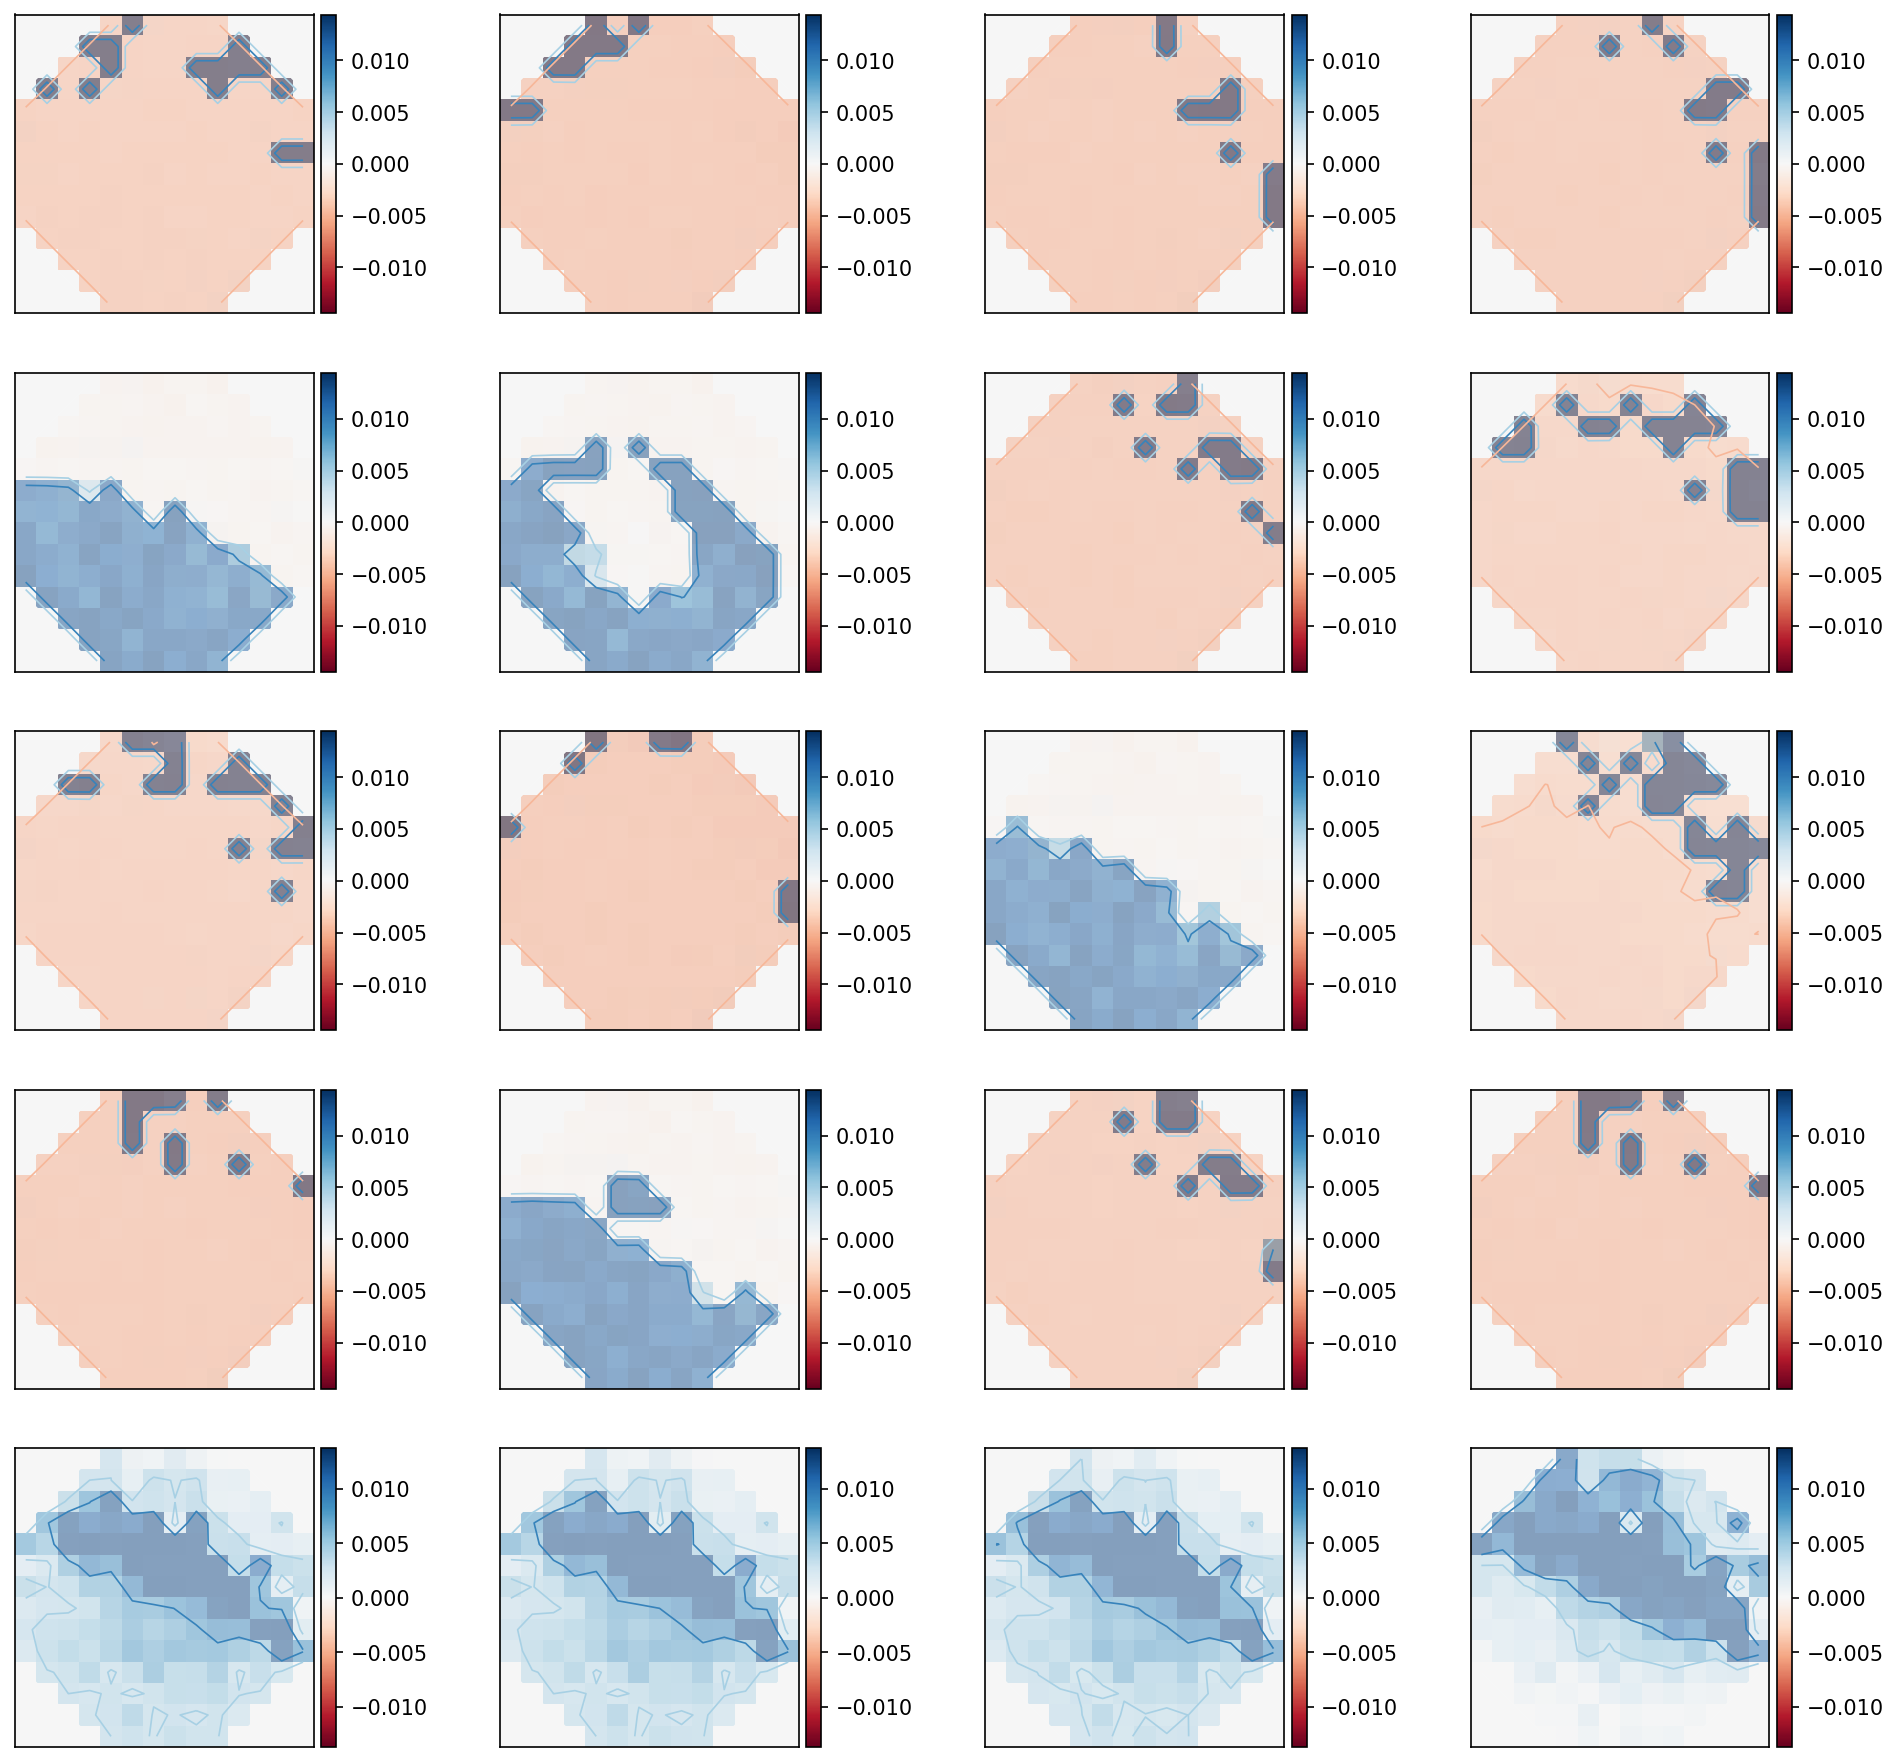

In [108]:
plot_rfs(0,49)

In [23]:
with open('./../results/sim_lgn_wave_rfs_ne=16_ni=4/' +\
    'seed={:d}_iter={:d}.pkl'.format(0,9), 'rb') as handle:
    res_dict = pickle.load(handle)

wen = res_dict['wex'][:,:n_in_rf]
wef = res_dict['wex'][:,n_in_rf:]
win = res_dict['wix'][:,:n_in_rf]
wif = res_dict['wix'][:,n_in_rf:]
wee = res_dict['wee']
wei = res_dict['wei']
wie = res_dict['wie']
wii = res_dict['wii']

In [20]:
with open('./../results/sim_lgn_wave_rfs_ne=16_ni=4/' +\
    'seed={:d}_iter={:d}.pkl'.format(0,0), 'rb') as handle:
    res_dict = pickle.load(handle)

In [26]:
wen

array([[3.46969630e-03, 1.71570405e-03, 2.85367322e-05, ...,
        4.50955883e-03, 2.13776166e-03, 4.58535738e-03],
       [4.47489183e-03, 3.20627628e-03, 4.11268632e-03, ...,
        4.48799947e-03, 1.70039018e-03, 7.63120963e-04],
       [4.40015520e-03, 1.07866304e-03, 4.77377673e-03, ...,
        1.00056998e-10, 1.01392607e-03, 1.02986709e-03],
       ...,
       [3.01588552e-03, 1.06741867e-03, 5.76098805e-03, ...,
        2.47563101e-04, 3.23231178e-03, 2.08185593e-03],
       [5.63408582e-03, 6.41026170e-03, 3.40190753e-03, ...,
        5.82182711e-03, 6.41023813e-03, 1.00051587e-10],
       [5.80354220e-03, 2.42224051e-03, 4.79113561e-04, ...,
        2.08855305e-05, 1.54236169e-03, 4.55753090e-03]])

In [9]:
win

array([[0.00471191, 0.00471999, 0.00471531, 0.00471524, 0.00472085,
        0.00312598, 0.00471463, 0.00472371, 0.0047254 , 0.00472739,
        0.0047265 , 0.00472096, 0.00472842, 0.00317652, 0.00472314,
        0.0047366 , 0.00473955, 0.0063201 , 0.00632288, 0.00471859,
        0.00474801, 0.00472699, 0.00472867, 0.00315556, 0.00472986,
        0.00474244, 0.0047381 , 0.00632931, 0.0063224 , 0.00631917,
        0.0063243 , 0.00632286, 0.00632374, 0.00473681, 0.00334199,
        0.00321962, 0.00318049, 0.00472816, 0.00474734, 0.00472448,
        0.00632529, 0.00473926, 0.00632781, 0.00632338, 0.00632122,
        0.0063305 , 0.00473225, 0.00474179, 0.0047326 , 0.00472453,
        0.00331152, 0.00474077, 0.00475925, 0.00632807, 0.0063305 ,
        0.00632824, 0.00632922, 0.00632937, 0.0063305 , 0.00632682,
        0.00477094, 0.00478497, 0.00474741, 0.00473103, 0.00331171,
        0.00473822, 0.00473946, 0.0063305 , 0.0063305 , 0.00632985,
        0.0063305 , 0.00632801, 0.00632809, 0.00

In [8]:
wie

array([[0.03186963, 0.02658068, 0.03194223, 0.03232596, 0.03148763,
        0.02752543, 0.03204882, 0.0321082 , 0.03223601, 0.02946088,
        0.03186935, 0.03185357, 0.03199477, 0.03232631, 0.03232106,
        0.03204947],
       [0.03186963, 0.02658068, 0.03194223, 0.03232596, 0.03148763,
        0.02752543, 0.03204882, 0.0321082 , 0.03223601, 0.02946088,
        0.03186935, 0.03185357, 0.03199477, 0.03232631, 0.03232106,
        0.03204947],
       [0.03186957, 0.02658068, 0.03194235, 0.03232603, 0.0314876 ,
        0.02752542, 0.03204871, 0.03210829, 0.03223609, 0.0294609 ,
        0.03186929, 0.03185352, 0.03199469, 0.03232639, 0.03232114,
        0.03204934],
       [0.03186955, 0.02658068, 0.03194239, 0.03232606, 0.03148759,
        0.02752541, 0.03204867, 0.03210832, 0.03223612, 0.0294609 ,
        0.03186927, 0.0318535 , 0.03199467, 0.03232642, 0.03232117,
        0.0320493 ]])